In [12]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "# Import required libraries\n",
    "from dotenv import load_dotenv\n",
    "load_dotenv()\n",
    "\n",
    "import kaggle\n",
    "kaggle.api.authenticate()\n",
    "\n",
    "import pandas as pd \n",
    "import numpy as np \n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns \n",
    "import warnings \n",
    "warnings.filterwarnings(\"ignore\")\n",
    "\n",
    "# Load Dataset\n",
    "import kagglehub\n",
    "import os\n",
    "\n",
    "# Download latest version\n",
    "path = kagglehub.dataset_download(\"ayushcx/apple-sales-dataset-2024\")\n",
    "\n",
    "# Find the CSV file in the directory\n",
    "csv_path = os.path.join(path, \"apple_sales_2024.csv\")  # Add the actual CSV filename\n",
    "df = pd.read_csv(csv_path)\n",
    "print(df.head())"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.

SyntaxError: unterminated string literal (detected at line 52) (3610813930.py, line 52)

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

#Import Libaries and Load Dataset

In [6]:
# Import required libraries first
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

# Then import kaggle related libraries
from dotenv import load_dotenv
load_dotenv()

import kaggle
kaggle.api.authenticate()

import kagglehub
import os

# Now load the data
path = kagglehub.dataset_download("ayushcx/apple-sales-dataset-2024")

# Find the CSV file in the directory
csv_path = os.path.join(path, "apple_sales_2024.csv")
df = pd.read_csv(csv_path)
print(df.head())

       State         Region  iPhone Sales (in million units)  \
0  Chongqing  Greater China                             7.46   
1    Germany         Europe                             8.63   
2         UK         Europe                             5.61   
3   Shanghai  Greater China                             7.82   
4   Thailand   Rest of Asia                            16.70   

   iPad Sales (in million units)  Mac Sales (in million units)  \
0                           6.75                          1.19   
1                          14.06                          7.03   
2                          14.09                          8.78   
3                           7.97                          9.78   
4                           8.13                          6.46   

   Wearables (in million units)  Services Revenue (in billion $)  
0                          5.88                            15.88  
1                          7.42                            10.12  
2                

#Data Cleaning and Preprocessing

In [7]:
# Check for missing values
df.isnull().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

Dataset returns clean with no missing values

#Exploratory Data Analysis

We will explore the dataset using a couple visualizations options to uncover insights and patterns in data

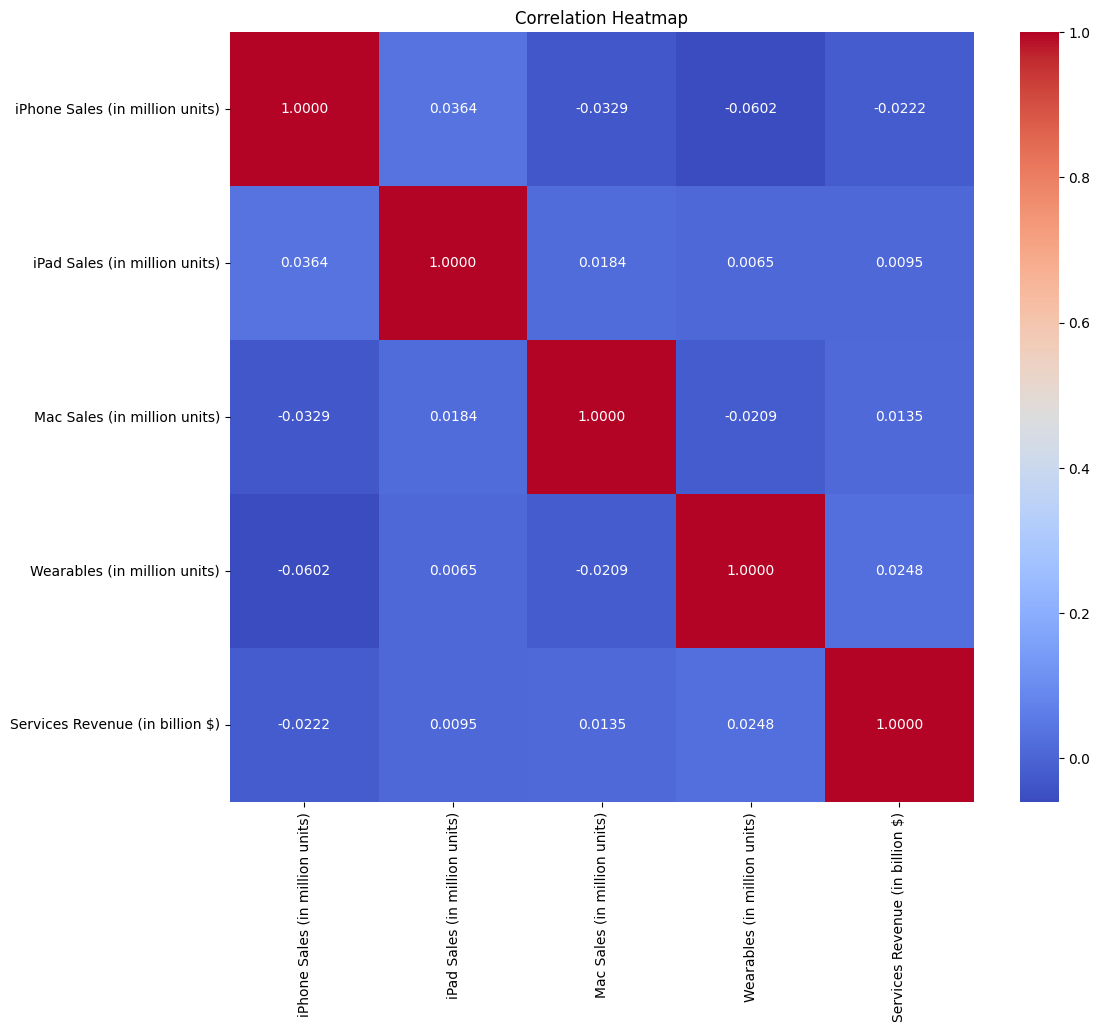

In [10]:
## Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Heatmap')
plt.show()

### Analysis of Correlation Heat Map

A correlation heatmap visualizes the relationships between numerical variables in your dataset, providing several key insights:
1. Correlation strength: The color intensity represents the strength of the correlation between two variables. Strong correlations are represented by darker shades, while weaker correlations are lighter. Values range from -1 to +1.

- +1 Dark Red: Strong positive correlation
- -1 Dark Blue: Strong negative correlation
- 0 Light Gray: No correlation



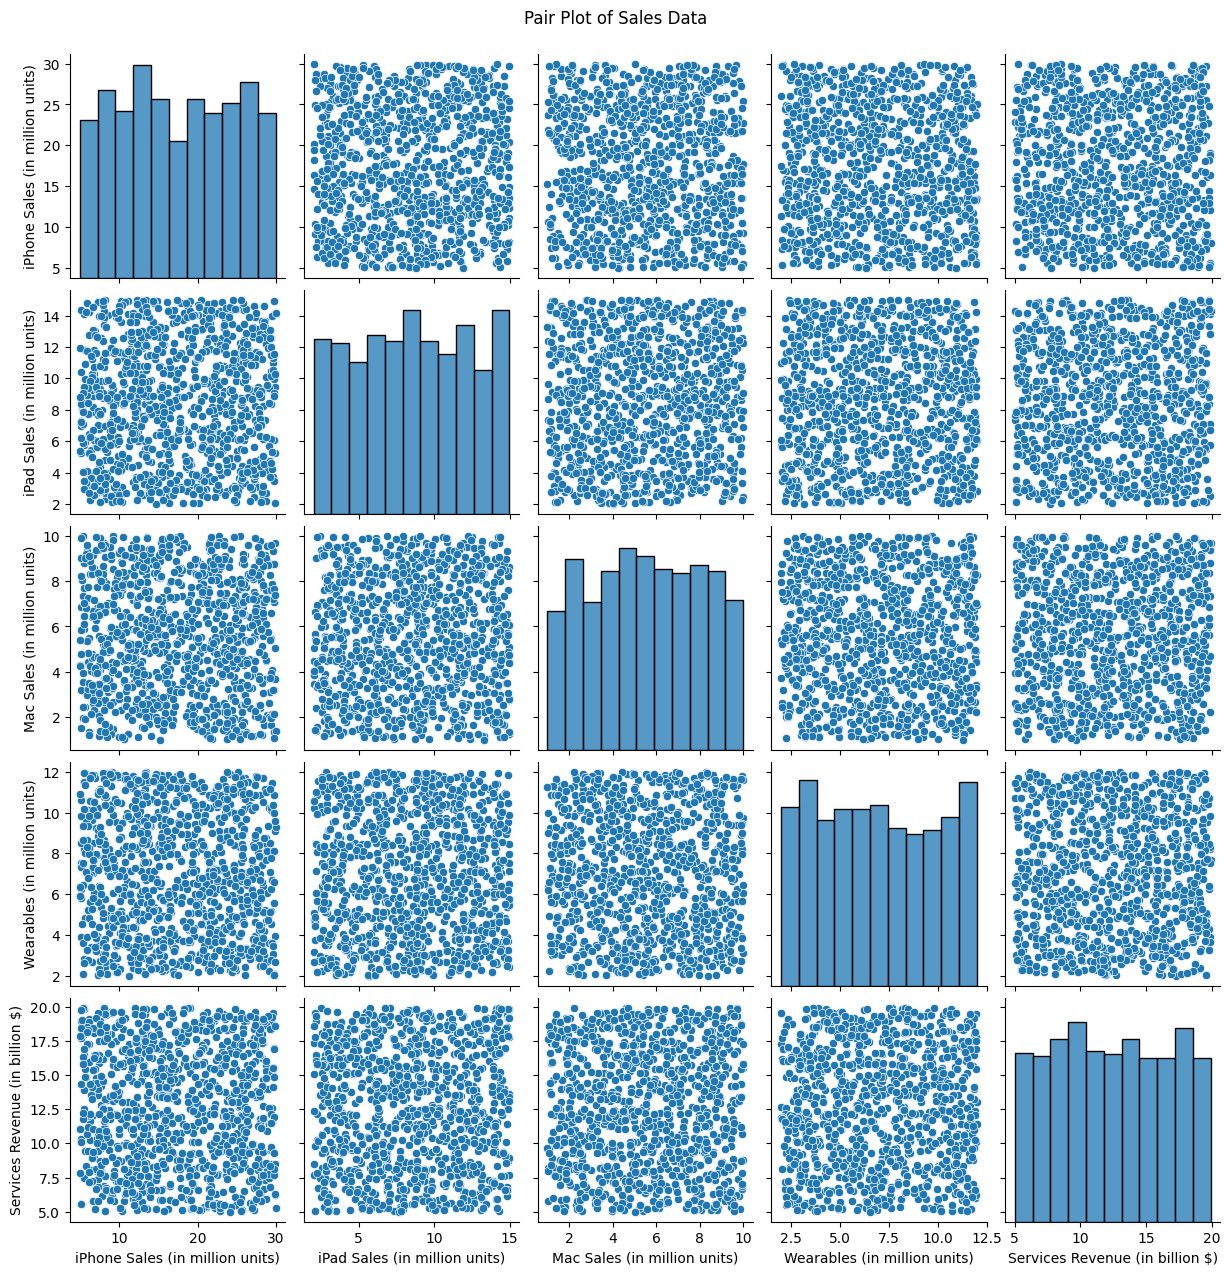

In [11]:
## Pair plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Sales Data', y=1.02)
plt.show()

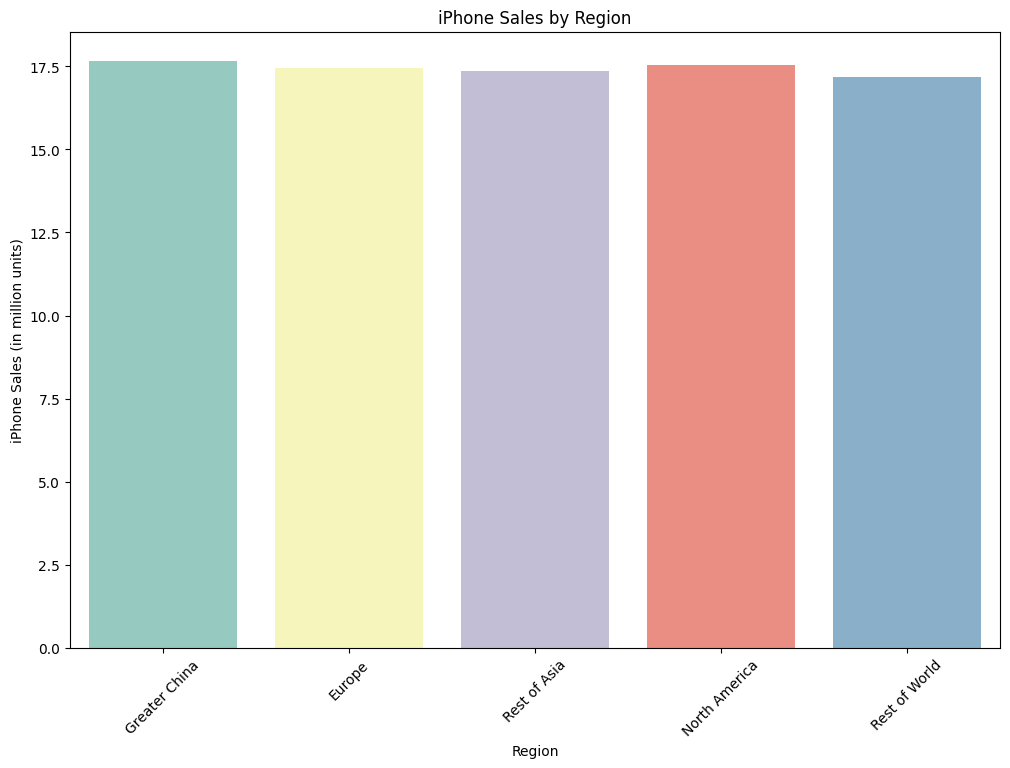

In [21]:
## Bar plot for sales by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='iPhone Sales (in million units)', 
            data=df, 
            palette='Set3',  # You can use: Set3, husl, rainbow, etc.
            ci=None)
plt.title('iPhone Sales by Region')
plt.xticks(rotation=45)
plt.show()

#Predictive Modeling

We can try to predict one of the sales figures compared to the other. We will use a linear regression model to predict iPhone Sales 

In [25]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['iPad Sales (in million units)', 'Mac Sales (in million units)', 'Wearables (in million units)', 'Services Revenue (in billion $)']]
y = df['iPhone Sales (in million units)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(53.05679117142261, -0.013370467073819947)

## Prediction Result Explanation

**MSE (Mean Squared Error) = 53.05679**

This measures the average squared difference between predicted and actual iPhone sales
The units are squared (million units²), so this is a large error in prediction
Root MSE would be about 7.28 million units of error on average

**R² Score = -0.01337**
R² normally ranges from 0 to 1 where 1 is a perfect fit and 0 is no fit at all. Negative values occur when model performs worse than horizontal line (no fit)

The score incdicates that the model is performing poorly and it would be better to use the mean of iPhone sales as a prediction. 

## Conclusion

There might not be a strong linear relationship between iPhone sales and other products. 

## Future Work and Improvements

1. Consider non-linear models
2. Add more features to the model
3. Try other algorithms like Random Forest or Gradient Boosting